In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

In [3]:
zipcode = '97035'
filename = 'data/' + zipcode + '_homes_data_cleaned.csv'
df = pd.read_csv(filename)

In [4]:
df.describe(include='all')

,Address,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
count,161,1.610000e+02,161.000000,161.000000,161.000000,161,161.000000,161,161,161,161,161,161
unique,161,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2
top,16900 Gassner Ln,NaN,NaN,NaN,NaN,Yes,NaN,Yes,No,Single Family Residential,Clackamas County,No,Yes
freq,1,NaN,NaN,NaN,NaN,88,NaN,105,159,105,123,157,95
mean,NaN,8.952504e+05,3.043478,2.366460,2069.118012,NaN,1980.726708,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.154414e+06,1.080207,0.913027,1251.263848,NaN,18.238348,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.500000e+05,1.000000,1.000000,600.000000,NaN,1920.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.400000e+05,2.000000,2.000000,1182.000000,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,6.250000e+05,3.000000,2.500000,1784.000000,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.400000e+05,4.000000,2.500000,2637.000000,NaN,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Address                0
price                  0
beds                   0
baths                  0
sqft                   0
view_yn                0
yr_built               0
cooling_yn             0
senior_community_yn    0
style                  0
county                 0
new_construction_yn    0
has_hoa                0
dtype: int64

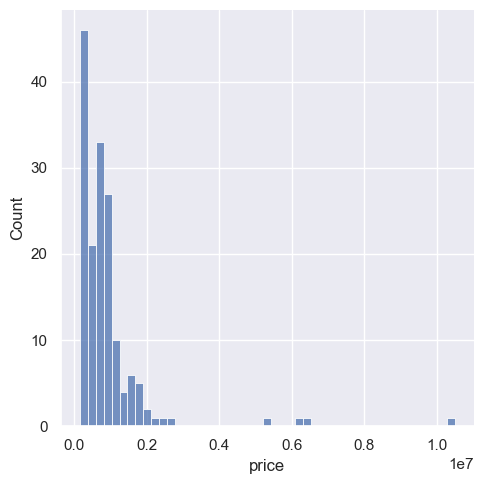

In [6]:
ax=sns.displot(df['price'])

In [7]:
q = df['price'].quantile(0.95)
df = df[df['price']<q]

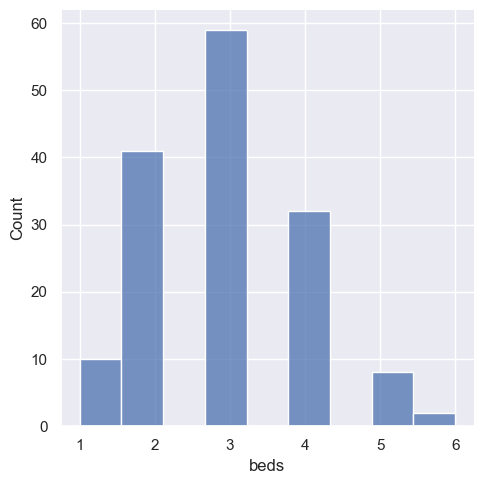

In [8]:
ax=sns.displot(df['beds'])

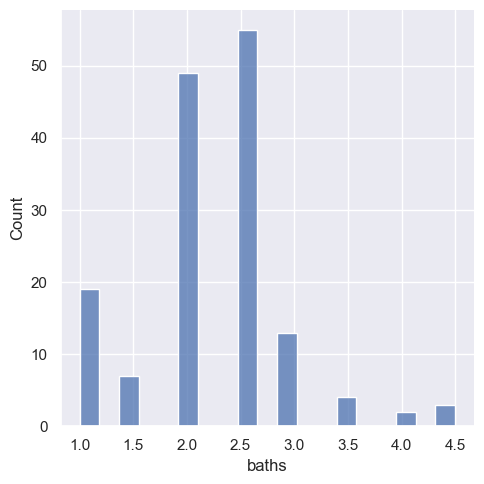

In [9]:
ax=sns.displot(df['baths'])

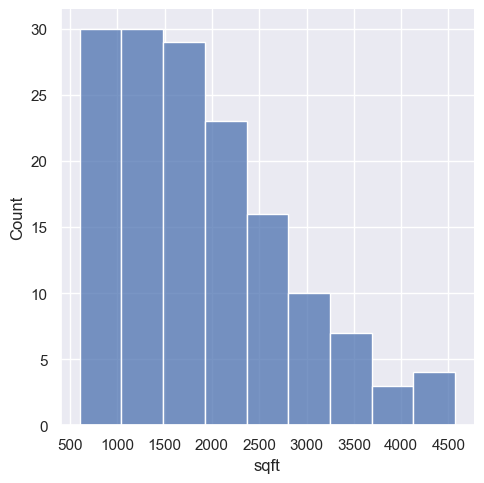

In [10]:
ax=sns.displot(df['sqft'])

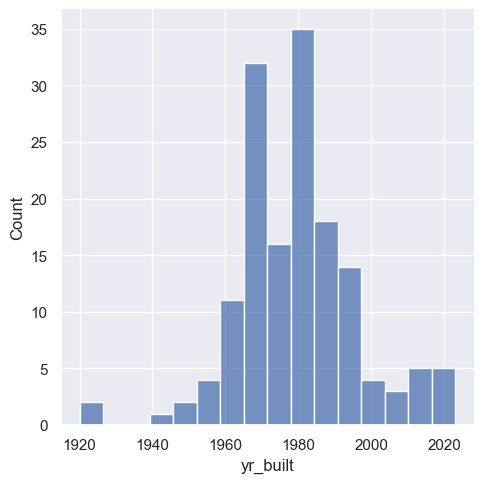

In [11]:
ax=sns.displot(df['yr_built'])

In [12]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built']>q]

In [13]:
df = df.reset_index(drop=True)
df.describe(include='all')

,Address,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
count,150,1.500000e+02,150.000000,150.000000,150.000000,150,150.000000,150,150,150,150,150,150
unique,150,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2
top,16900 Gassner Ln,NaN,NaN,NaN,NaN,Yes,NaN,Yes,No,Single Family Residential,Clackamas County,No,Yes
freq,1,NaN,NaN,NaN,NaN,81,NaN,94,148,94,112,149,92
mean,NaN,6.845034e+05,2.953333,2.226667,1876.860000,NaN,1980.060000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.064483e+05,1.044877,0.706125,922.747226,NaN,15.136617,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.500000e+05,1.000000,1.000000,600.000000,NaN,1941.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.275000e+05,2.000000,2.000000,1170.000000,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,6.100000e+05,3.000000,2.250000,1619.500000,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.962500e+05,4.000000,2.500000,2425.500000,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Checking OLS Assumptions

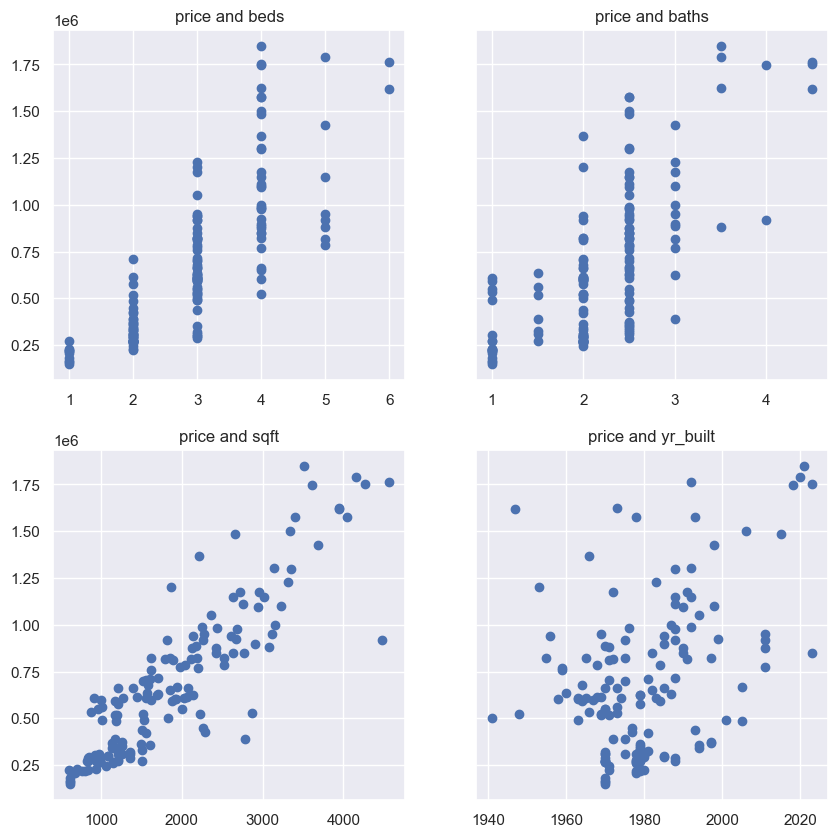

In [14]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
ax1.scatter(df['beds'], df['price'])
ax1.set_title('price and beds')
ax2.scatter(df['baths'], df['price'])
ax2.set_title('price and baths')
ax3.scatter(df['sqft'], df['price'])
ax3.set_title('price and sqft')
ax4.scatter(df['yr_built'], df['price'])
ax4.set_title('price and yr_built')

plt.show()

### Relationships look fairly linear, so no transformation of price at this time

## Checking for multicollinearity

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['beds', 'baths', 'sqft', 'yr_built']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [16]:
vif

,VIF,features
0,25.240328,beds
1,34.741669,baths
2,22.206086,sqft
3,14.787970,yr_built


### I will want to think about how to reduce multicollinearity
One idea is to search how people model home pricing on kaggle

## Create Dummy variables

In [17]:
# Reorder columns
columns = ['Address', 'price', 'beds', 'baths', 'sqft', 'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style', 'county', 'new_construction_yn', 'has_hoa']
df = df[columns]

In [18]:
df = pd.get_dummies(df, columns=df.columns[6:], drop_first=True)

In [19]:
df.head()

,Address,price,beds,baths,sqft,yr_built,view_yn_Yes,cooling_yn_Yes,senior_community_yn_Yes,style_Single Family Residential,county_Multnomah County,new_construction_yn_Yes,has_hoa_Yes
0,16900 Gassner Ln,1622500,4,3.5,3953,1973,0,1,0,1,0,0,0
1,4672 Winthrop Ct,1790000,5,3.5,4161,2020,0,1,0,1,0,0,1
2,47 Eagle Crest Dr #4,270000,2,1.0,932,1979,1,0,0,0,1,0,1
3,4968 Bilford Ln,1050000,3,2.5,2365,1994,0,1,0,1,0,0,1
4,15988 White Oaks Dr,1109000,4,2.5,2761,1988,1,1,0,1,0,0,1


## Linear Regression Model

In [20]:
targets = df['price']
inputs = df.drop(['Address', 'price', 'senior_community_yn_Yes', 'new_construction_yn_Yes', 'view_yn_Yes'], axis=1)

### Scale the data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [22]:
inputs_scaled = scaler.transform(inputs)

In [23]:
inputs_scaled

array([[ 1.00506891,  1.8093093 ,  2.25749285, ...,  0.77184498,
        -0.58248237, -1.25944706],
       [ 1.96532583,  1.8093093 ,  2.48366185, ...,  0.77184498,
        -0.58248237,  0.79399923],
       [-0.91544493, -1.74299954, -1.02739444, ..., -1.29559694,
         1.71679015,  0.79399923],
       ...,
       [ 1.00506891,  0.38838577,  0.84719864, ...,  0.77184498,
        -0.58248237, -1.25944706],
       [ 1.00506891,  0.38838577,  0.87329506, ...,  0.77184498,
        -0.58248237,  0.79399923],
       [-0.91544493,  0.38838577, -0.7555567 , ..., -1.29559694,
        -0.58248237,  0.79399923]])

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=47)

### Regression

In [25]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

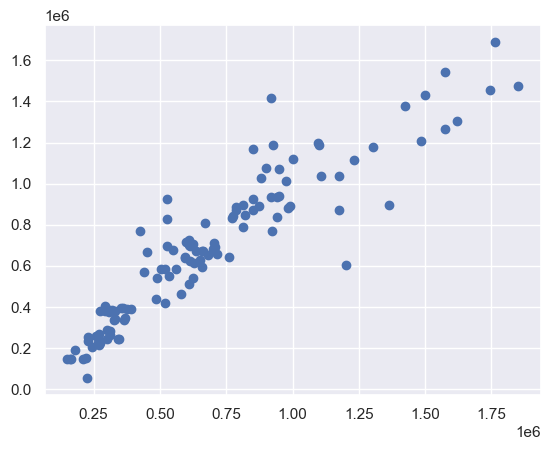

In [26]:
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)

Text(0.5, 1.0, 'Residuals PDF')

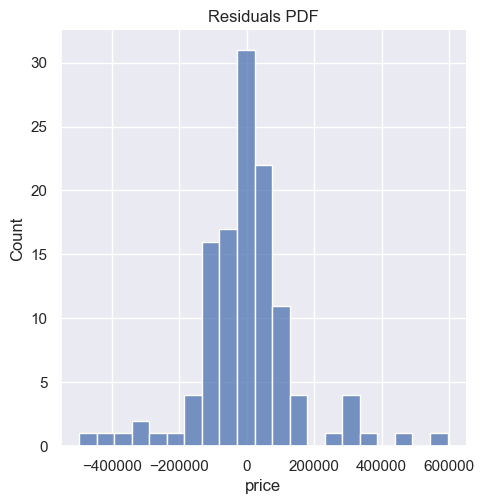

In [27]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF")

In [28]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [29]:
adj_r2(x_train, y_train)

0.8489603118272752

In [30]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_

In [31]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(x_train, y_train)

In [32]:
reg_summary['f_stat'] = f_stat.round(3)
reg_summary['p_value'] = p_values.round(3)
reg_summary

,Features,Weights,f_stat,p_value
0,beds,40475.278482,189.783,0.000
1,baths,-55031.824047,95.399,0.000
2,sqft,294700.092478,382.959,0.000
3,yr_built,63536.233100,16.236,0.000
4,cooling_yn_Yes,20501.935209,12.053,0.001
5,style_Single Family Residential,41066.422609,107.637,0.000
6,county_Multnomah County,-40057.522428,15.097,0.000
7,has_hoa_Yes,-65537.149047,13.717,0.000


In [33]:
y_hat_test = reg.predict(x_test)

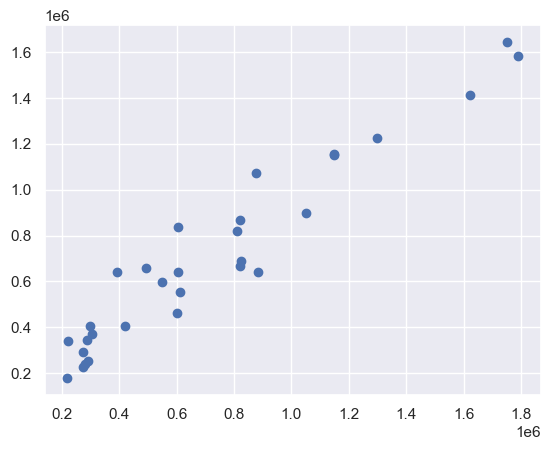

In [34]:
plt.scatter(y_test, y_hat_test)

In [35]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])

In [36]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = y_test
df_pf

,Predictions,Target
0,1.156399e+06,1150000
1,1.412597e+06,1622500
2,6.426332e+05,885000
3,4.042443e+05,420000
4,3.436342e+05,287500
5,8.668094e+05,820000
6,1.644958e+06,1750000
7,6.904281e+05,824900
8,3.403416e+05,222621
9,4.625442e+05,599999


In [37]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference%'] = df_pf['Residual']/df_pf['Target']*100
df_pf

,Predictions,Target,Residual,Difference%
0,1.156399e+06,1150000,-6399.384544,-0.556468
1,1.412597e+06,1622500,209903.219924,12.937024
2,6.426332e+05,885000,242366.775622,27.386076
3,4.042443e+05,420000,15755.670155,3.751350
4,3.436342e+05,287500,-56134.157561,-19.524924
5,8.668094e+05,820000,-46809.441207,-5.708468
6,1.644958e+06,1750000,105042.158731,6.002409
7,6.904281e+05,824900,134471.937191,16.301605
8,3.403416e+05,222621,-117720.552285,-52.879357
9,4.625442e+05,599999,137454.808499,22.909173
